In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
def plot_mean_std(data, title='dms'):
    """
    Plots the mean and standard deviation of each group in a numpy array.

    Parameters:
    data (numpy.ndarray): A 2D numpy array of shape (b, L).
    """


    # Calculate mean and standard deviation along the second dimension
    mean_values = np.mean(data, axis=0)
    std_values = np.std(data, axis=0)

    # Create a bar plot
    x = np.arange(data.shape[1])  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    ax.bar(x, mean_values, width, yerr=std_values, label='Mean with STD')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Values')
    ax.set_title(f'{title} Mean and STD per position')
    ax.set_xticks(x)
    ax.set_xticklabels([f'p\n {i+1}' for i in range(data.shape[1])])
    ax.legend()

    plt.show()

import seaborn as sns
def plot_distributions(data1, data2, title1, title2):
    """
    Plots the distribution of each group in two numpy arrays.

    Parameters:
    data1, data2 (numpy.ndarray): 2D numpy arrays of shape (b, L).
    title1, title2 (str): Titles for the plots.
    """
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Flatten the data for distribution plots
    flattened_data1 = data1.flatten()
    flattened_data2 = data2.flatten()

    # Plot distributions for the first dataset
    sns.histplot(flattened_data1, kde=True, ax=axes[0], color='blue')
    axes[0].set_title(f'Distribution of {title1}')
    axes[0].set_xlabel('Values')
    axes[0].set_ylabel('Frequency')

    # Plot distributions for the second dataset
    sns.histplot(flattened_data2, kde=True, ax=axes[1], color='green')
    axes[1].set_title(f'Distribution of {title2}')
    axes[1].set_xlabel('Values')
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Example usage

def plot_mean_std_combined(data1, data2, title,  label1='Dataset 1', label2='Dataset 2'):
    """
    Plots the mean and standard deviation of each group in two numpy arrays on the same plot.

    Parameters:
    data1, data2 (numpy.ndarray): 2D numpy arrays of shape (b, L).
    title (str): Title for the plot.
    """
    import numpy as np
    import matplotlib.pyplot as plt

    # Calculate mean and standard deviation for both datasets
    mean_values1 = np.mean(data1, axis=0)
    std_values1 = np.std(data1, axis=0)
    mean_values2 = np.mean(data2, axis=0)
    std_values2 = np.std(data2, axis=0)

    # Create a bar plot with both datasets
    x = np.arange(data1.shape[1])  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 5))
    rects1 = ax.bar(x - width/2, mean_values1, width, yerr=std_values1, label=label1, color='blue')
    rects2 = ax.bar(x + width/2, mean_values2, width, yerr=std_values2, label=label2, color='orange')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Values')
    ax.set_title(f'{title} Mean and STD per Position')
    ax.set_xticks(x)
    ax.set_xticklabels([f'p\n{i+1}' for i in range(data1.shape[1])])
    ax.legend()

    plt.show()
    
    
def plot_filled_distributions(data1, data2, title, label1='Dataset 1', label2='Dataset 2'):
    """
    Plots the filled distributions of each group in two numpy arrays.

    Parameters:
    data1, data2 (numpy.ndarray): 2D numpy arrays of shape (b, L).
    title (str): Title for the plot.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Flatten the data for distribution plots
    flat_data1 = data1.flatten()
    flat_data2 = data2.flatten()

    # Create distribution plots
    plt.figure(figsize=(10, 6))
    sns.kdeplot(flat_data1, color='blue', label=label1, fill=True)
    sns.kdeplot(flat_data2, color='orange', label=label2, fill=True)

    # Add title and legend
    plt.title(title)
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.legend()

    plt.show()



In [18]:
def mean_absolute_error(arr1, arr2):
    """
    Calculate the Mean Absolute Error (MAE) between two numpy arrays.

    Parameters:
    arr1, arr2 (numpy.ndarray): Two numpy arrays for comparison.

    Returns:
    float: The mean absolute error between the two arrays.
    """
    # Ensure that the arrays have the same shape
    if arr1.shape != arr2.shape:
        raise ValueError("The two arrays must have the same shape.")

    # Calculate the MAE
    mae = np.mean(np.abs(arr1 - arr2))
    return mae

def calculate_separate_correlations(dfs):
    """
    Takes a list of dataframes, each with two columns 'reactivity_DMS_MaP' and 'reactivity_2A3_MaP',
    and calculates two separate correlation matrices: 
    - one for correlations between 'reactivity_DMS_MaP' columns across all dataframes,
    - another for correlations between 'reactivity_2A3_MaP' columns across all dataframes.

    :param dfs: List of pandas DataFrames
    :return: Two DataFrames with correlation values
    """
    num_dfs = len(dfs)

    # Extracting each column from all dataframes
    dms_columns = [df['reactivity_DMS_MaP'] for df in dfs if 'reactivity_DMS_MaP' in df.columns]
    a3_columns = [df['reactivity_2A3_MaP'] for df in dfs if 'reactivity_2A3_MaP' in df.columns]

    # Concatenating the columns for each metric
    concatenated_DMS = pd.concat(dms_columns, axis=1)
    concatenated_2A3 = pd.concat(a3_columns, axis=1)

    # Calculating the correlation matrices
    dms_correlation_matrix = concatenated_DMS.corr()
    a3_correlation_matrix = concatenated_2A3.corr()

    return dms_correlation_matrix, a3_correlation_matrix


In [19]:

L_207_min = 59440671
L_207_max = 266440670
L_307_min = 266440671
L_307_max = 267054670
L_457_min = 267054671
L_457_max = 269796670


In [20]:
def get_data(name, min_id, max_id, L, order = 'first'):
    L_307 = pd.read_parquet(f'{name}.parquet').set_index('id').iloc[min_id:max_id+1].values
    if order == 'first':
        dms = L_307[:,0].reshape(-1, L)[:, :26]
        a23 = L_307[:,1].reshape(-1, L)[:, :26]
    else:
        dms = L_307[:,0].reshape(-1, L)[:, -21:]
        a23 = L_307[:,1].reshape(-1, L)[:, -21:]
    return dms, a23 


In [21]:
order = 'end'
name_1 = 'all1'
name_2 = 'all_ex1'
dms, a23 = get_data(name_1, L_207_min, L_207_max, 207, order)
dms_nor, a23_nor = get_data(name_2, L_207_min, L_207_max, 207, order)
# plot_mean_std(dms, 'dms');
# plot_mean_std(a23, 'a23');

In [22]:
mean_absolute_error(np.concatenate([dms, a23], axis=1), np.concatenate([dms_nor, a23_nor], axis=1))

0.062024599583298236

In [23]:

# plot_mean_std(dms, 'dms');
# plot_mean_std(a23, 'a23');

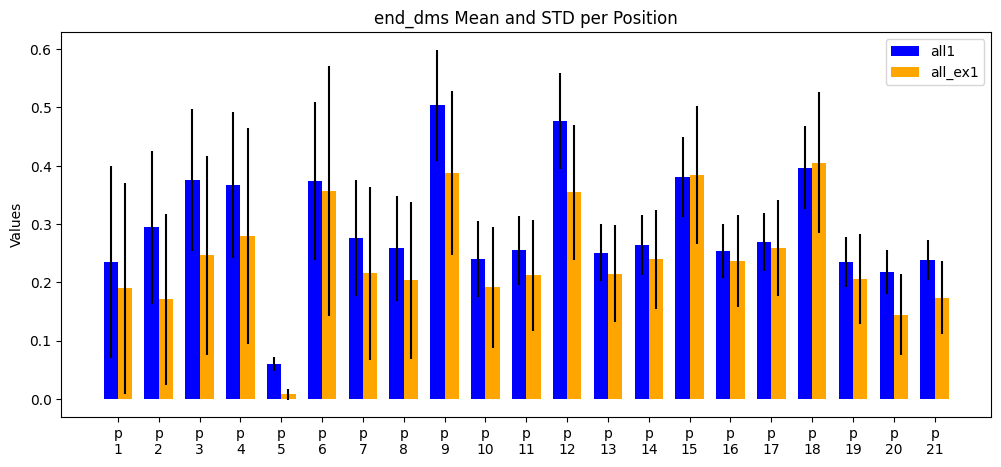

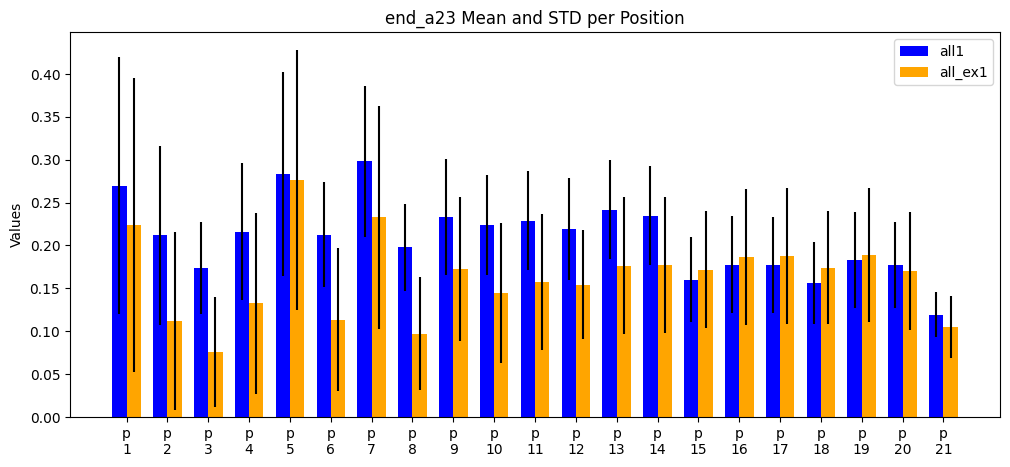

In [24]:
plot_mean_std_combined(dms, dms_nor, 'end_dms', name_1, name_2)
plot_mean_std_combined(a23, a23_nor, 'end_a23', name_1, name_2)

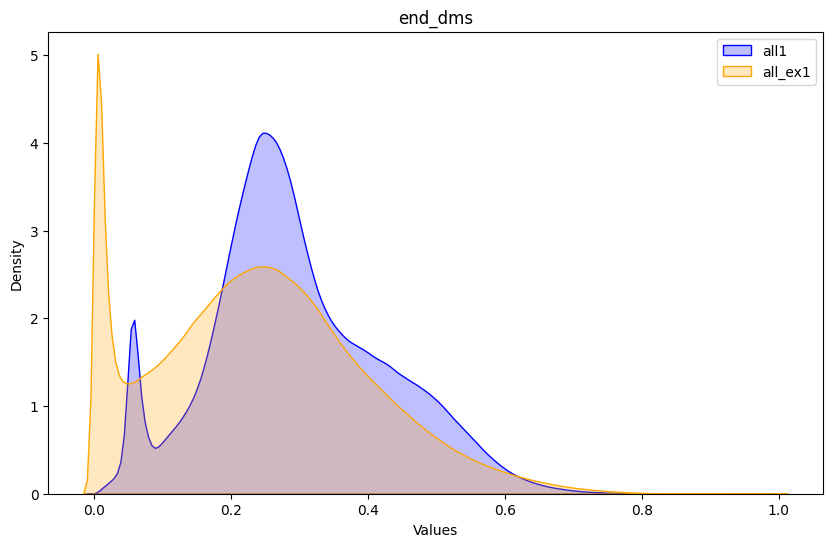

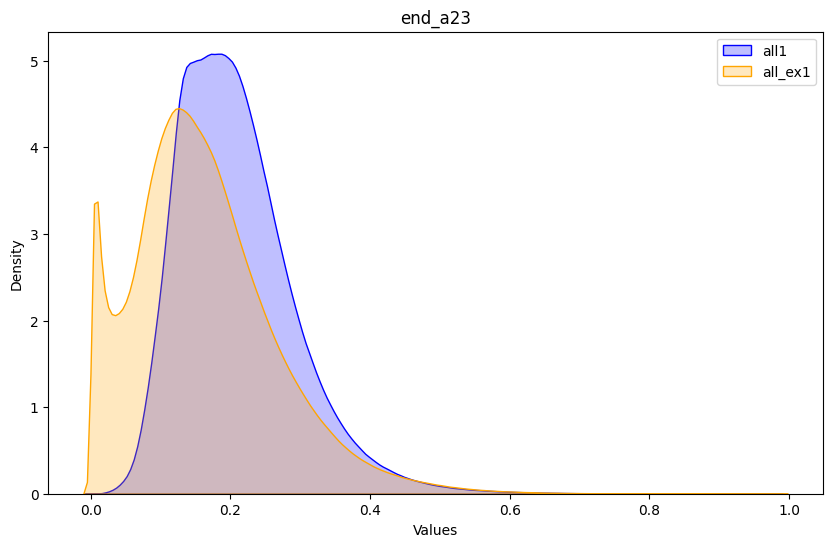

In [25]:
plot_filled_distributions(dms, dms_nor, 'end_dms', name_1, name_2);
plot_filled_distributions(a23, a23_nor, 'end_a23', name_1, name_2);

0.08687287415113767


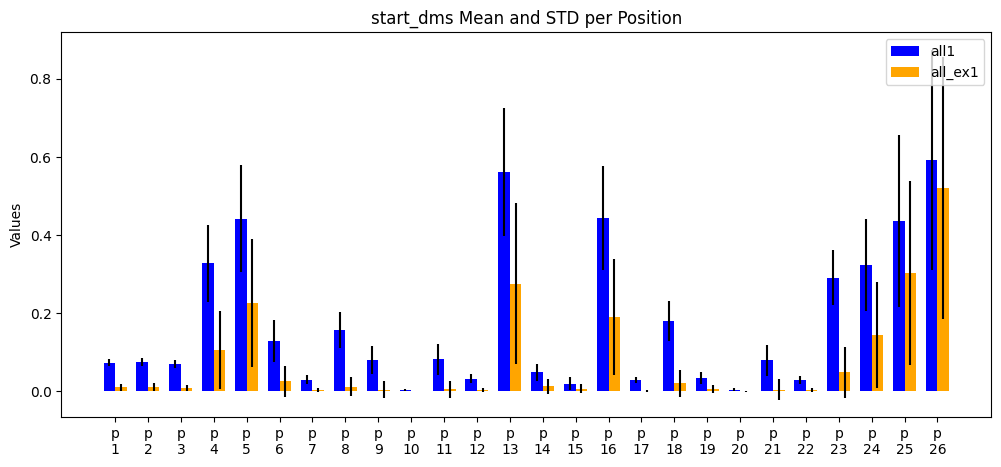

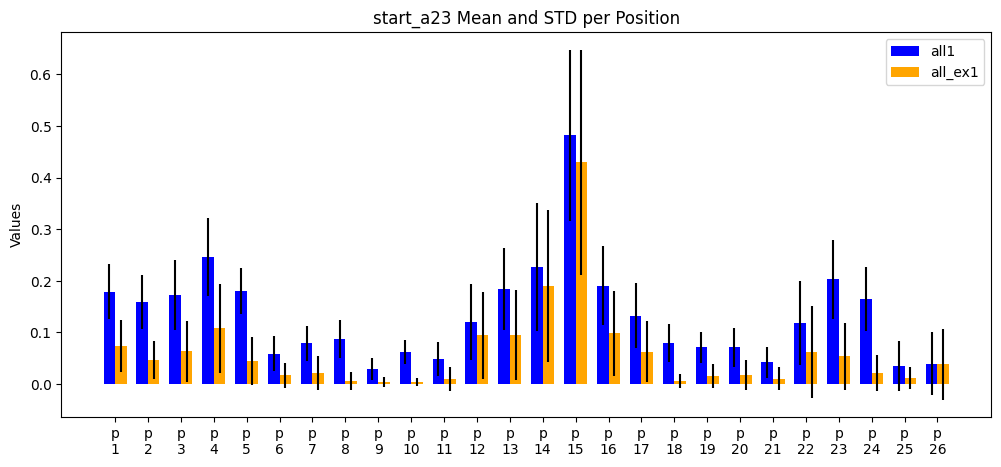

In [26]:
order='first'
dms, a23 = get_data(name_1, L_207_min, L_207_max, 207, order)
dms_nor, a23_nor = get_data(name_2, L_207_min, L_207_max, 207, order)
print(mean_absolute_error(np.concatenate([dms, a23], axis=1), np.concatenate([dms_nor, a23_nor], axis=1)))
plot_mean_std_combined(dms, dms_nor, 'start_dms', name_1, name_2)
plot_mean_std_combined(a23, a23_nor, 'start_a23', name_1, name_2)

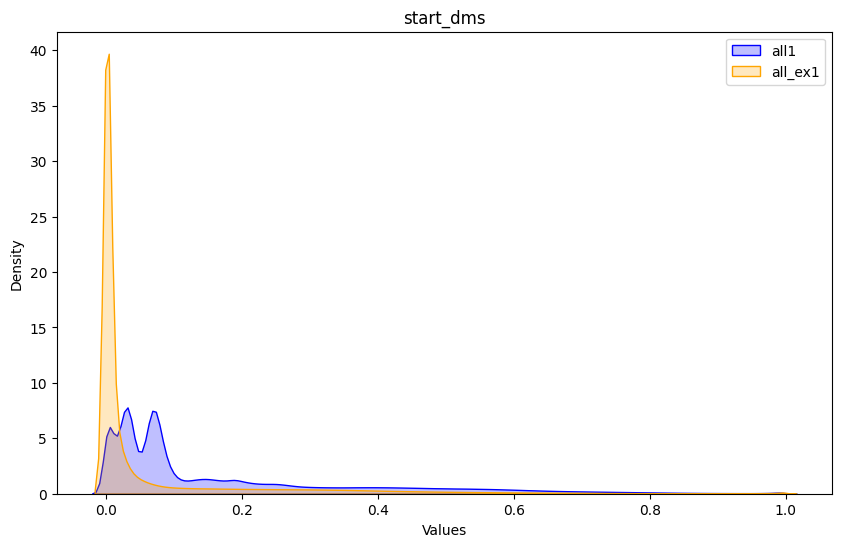

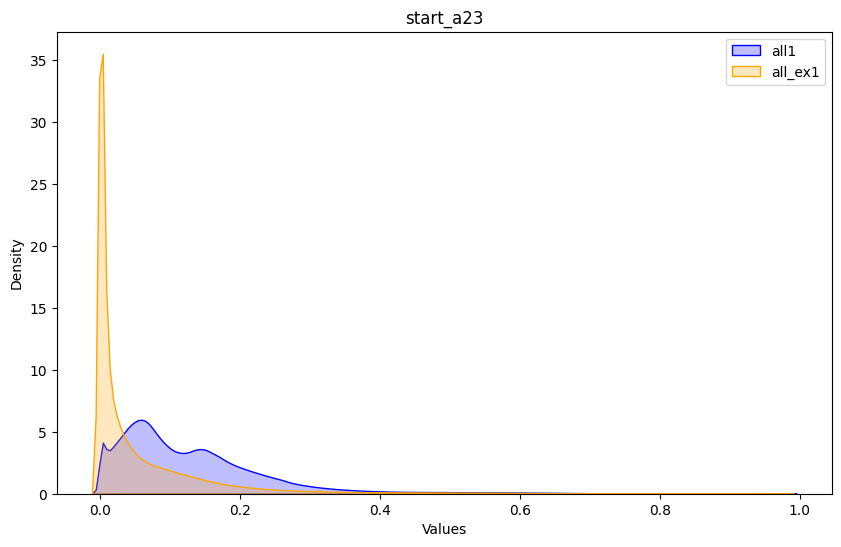

In [27]:
plot_filled_distributions(dms, dms_nor, 'start_dms', name_1, name_2);
plot_filled_distributions(a23, a23_nor, 'start_a23', name_1, name_2);

In [28]:
calculate_separate_correlations(
    [
        pd.read_parquet(f"{name_1}.parquet").set_index("id"),
        pd.read_parquet(f"{name_2}.parquet").set_index("id"),
    ]
)

(                    reactivity_DMS_MaP  reactivity_DMS_MaP
 reactivity_DMS_MaP             1.00000             0.96643
 reactivity_DMS_MaP             0.96643             1.00000,
                     reactivity_2A3_MaP  reactivity_2A3_MaP
 reactivity_2A3_MaP             1.00000             0.97037
 reactivity_2A3_MaP             0.97037             1.00000)

In [110]:
df = pd.read_parquet("../data/test_sequences.parquet")
df["start"] = df["id_min"].apply(lambda x: np.arange(x, x+26, 1))
df["end"] = df["id_max"].apply(lambda x: np.arange(((x+1)-21, x, 1))
mask = np.zeros((269796671))
mask[np.concatenate(df['start'].values)] = 1
mask[np.concatenate(df['end'].values)] = 1
mask = mask.astype(bool)


SyntaxError: '(' was never closed (746367651.py, line 3)

In [105]:
df['sequence'].apply(lambda x: x[:27])

0          GGGAACGACUCGAGUAGAGUCGAAAAU
1          GGGAACGACUCGAGUAGAGUCGAAAAU
2          GGGAACGACUCGAGUAGAGUCGAAAAA
3          GGGAACGACUCGAGUAGAGUCGAAAAU
4          GGGAACGACUCGAGUAGAGUCGAAAAU
                      ...             
1343818    GGGAACGACUCGAGUAGAGUCGAAAAG
1343819    GGGAACGACUCGAGUAGAGUCGAAAAG
1343820    GGGAACGACUCGAGUAGAGUCGAAAAG
1343821    GGGAACGACUCGAGUAGAGUCGAAAAG
1343822    GGGAACGACUCGAGUAGAGUCGAAAAG
Name: sequence, Length: 1343823, dtype: object

In [106]:
df

,id_min,id_max,sequence_id,sequence,future,start,end
0,0,176,eee73c1836bc,GGGAACGACUCGAGUAGAGUCGAAAAUUUCCUUCCAAAUCCUGAGG...,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[156, 157, 158, 159, 160, 161, 162, 163, 164, ..."
1,177,353,d2a929af7a97,GGGAACGACUCGAGUAGAGUCGAAAAUGUAAUCAGAUUGCUUCUCC...,0,"[177, 178, 179, 180, 181, 182, 183, 184, 185, ...","[333, 334, 335, 336, 337, 338, 339, 340, 341, ..."
2,354,530,d39a4425ff45,GGGAACGACUCGAGUAGAGUCGAAAAAACACAUGAAUUUGAGGGUU...,0,"[354, 355, 356, 357, 358, 359, 360, 361, 362, ...","[510, 511, 512, 513, 514, 515, 516, 517, 518, ..."
3,531,707,1fc41e92d553,GGGAACGACUCGAGUAGAGUCGAAAAUCAGAGCUGGCAAAUGGAUG...,0,"[531, 532, 533, 534, 535, 536, 537, 538, 539, ...","[687, 688, 689, 690, 691, 692, 693, 694, 695, ..."
4,708,884,1d0826fb892f,GGGAACGACUCGAGUAGAGUCGAAAAUUUGGUAUUUGAUGCAUUAA...,0,"[708, 709, 710, 711, 712, 713, 714, 715, 716, ...","[864, 865, 866, 867, 868, 869, 870, 871, 872, ..."
...,...,...,...,...,...,...,...
1343818,269794386,269794842,3cf515909422,GGGAACGACUCGAGUAGAGUCGAAAAGGAGGGAAAAGUUAUCAGGC...,1,"[269794386, 269794387, 269794388, 269794389, 2...","[269794822, 269794823, 269794824, 269794825, 2..."
1343819,269794843,269795299,3606852d6c2b,GGGAACGACUCGAGUAGAGUCGAAAAGGAGGGAAAAGUUAUCAGGC...,1,"[269794843, 269794844, 269794845, 269794846, 2...","[269795279, 269795280, 269795281, 269795282, 2..."
1343820,269795300,269795756,49b9448fd455,GGGAACGACUCGAGUAGAGUCGAAAAGGAGGGAAAAGUUAUCAGGC...,1,"[269795300, 269795301, 269795302, 269795303, 2...","[269795736, 269795737, 269795738, 269795739, 2..."
1343821,269795757,269796213,eb9bd6372550,GGGAACGACUCGAGUAGAGUCGAAAAGGAGGGAAAAGUUAUCAGGC...,1,"[269795757, 269795758, 269795759, 269795760, 2...","[269796193, 269796194, 269796195, 269796196, 2..."


In [108]:
len(df['sequence'][0])

177

In [109]:
mask[:177]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,